In [ ]:
!pip install sounddevice
#This Python module provides bindings for the PortAudio library and a few convenience functions to play and record NumPy arrays containing audio signals.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Portable Real-Time Audio Library. PortAudio is a portable audio I/O library designed for cross-platform support of audio 
#This Python module provides bindings for the PortAudio library and a few convenience functions to play and record NumPy arrays containing audio signals.

!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 65.4 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Fetched 65.4 kB in 1s (86.9 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Tel

In [ ]:
!pip install pycryptodome

#A collection of cryptographic modules implementing various algorithms and protocols(AES,RSA,etc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.2 MB/s eta 0:00:00


# Importing dependencies

In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
#import sounddevice as sd

import random
import string
from Crypto.Cipher import DES

import IPython.display as ipd
import librosa
import librosa.display


#wav file -- A lightweight package to read/write wave audio files to/from lists of native Python types.
#time -- used to calculate time taken
#IPythonIt -- is an interactive command-line terminal for Python. 

## ENCRYPTION

<ipython-input-74-50188460a538>:2: WavFileWarning: Reached EOF prematurely; finished at 3145728 bytes, expected 10406738 bytes from header.
  fs, data = wavfile.read(path)


Text(0.5, 1.0, 'Original Audio Plot')

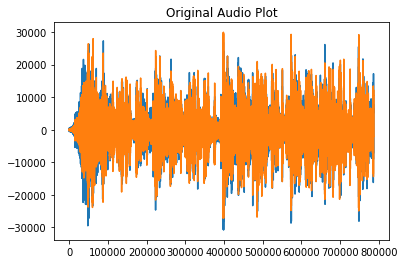

In [ ]:
path='/content/file_example_WAV_10MG.wav'
fs, data = wavfile.read(path)
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [ ]:
with open(path, 'rb') as fd:                #opening the wav file
    contents = fd.read()                    #reading the wav file

In [ ]:
# time initialization

import time
t1=time.time()

## Playing that sound

In [ ]:
# Original Sound
samples, sample_rate = librosa.load(path)
ipd.Audio(samples, rate=sample_rate)

## DES Key and IV

In [ ]:
DES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8)) 
#x=64 bits #key=64 64BITS/8=8 BYTE
#getting a random values for DES_key of size 64bits

DES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(8))
#getting a random values for DES_IV 
#IV -- starting variable is an input to a cryptographic primitive being used to provide the initial state.

In [ ]:
print("dES Key is ", DES_KEY)
print("dES Initialization vector is ", DES_IV)

dES Key is  uyeAcf8h
dES Initialization vector is  R6gCSF22


## Encrpytion of audio file

In [ ]:
#encryption using DES algorithm  

encryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))       
encrypted_audio = encryptor.encrypt(contents)

## Saving the encrypted file

In [ ]:
with open('/content/encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


In [ ]:
# calculating the time taken and printing

t2=time.time()
print('time taken for encryption-',(t2-t1)*1000,'ms')

time taken for encryption- 2130.2287578582764 ms


## DECRYPTION

In [ ]:
with open('/content/encrypted_audio_file.wav', 'rb') as fd:   #opening the wav file
    contents = fd.read()                                      #reading the wav file

In [ ]:
# time calculation

t3=time.time()

## Decryption of data

In [ ]:
# again doing des to the encrypted file

decryptor = DES.new(DES_KEY.encode("utf-8"), DES.MODE_CFB, DES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [ ]:
# Save the decrypted audio file

with open('/content/decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

In [ ]:
# calculating the time taken and printing

t4=time.time()
print('time taken for decryption -',(t4-t3)*1000,'ms')

time taken for decryption - 512.3803615570068 ms


<ipython-input-88-e48000e1867a>:1: WavFileWarning: Reached EOF prematurely; finished at 3145728 bytes, expected 10406738 bytes from header.
  fs, data = wavfile.read('/content/decrypted_audio_file.wav')


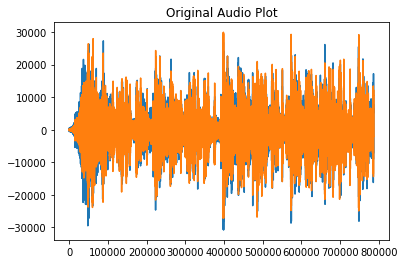

In [ ]:
#ploting the decrypted audio file which will be equal to original

fs, data = wavfile.read('/content/decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

In [ ]:
samples, sample_rate = librosa.load('/content/decrypted_audio_file.wav')
ipd.Audio(samples, rate=sample_rate)